In [1]:
using Plots
using DiffEqFlux, OrdinaryDiffEq, Flux, Optim
include("/Users/piotrsokol/Documents/RNNODE.jl/src/rnn_ode.jl")
import DiffEqSensitivity: ischeckpointing, isconcretetype
using Zygote
using LaTeXStrings

In [2]:
using MLDataUtils
function onehot(labels_raw, ntoken::Int=9)
    return  convertlabel(LabelEnc.OneOfK, labels_raw, LabelEnc.NativeLabels(collect(1:ntoken)))
end

onehot (generic function with 2 methods)

In [3]:
ipt = sqrt(1/2)randn(Float32,100,3)
ipt = rand(collect(Float32,1:9),(3,100))
lpt = LinearInterpolationFixedGrid(ipt);
cpt = ConstantInterpolationFixedGrid(ipt);
spt = CubicSplineFixedGrid(ipt);

In [14]:
∂nn = ∂RNNCell(9,2)
tspan = [0.f0,100.f0]
tsteps = collect(tspan[1] : tspan[2])
node = RNNODE(∂nn, [0.f0,100.f0], saveat=tsteps, preprocess=x-> permutedims(onehot((x))) );

# Testing forward solve, without input

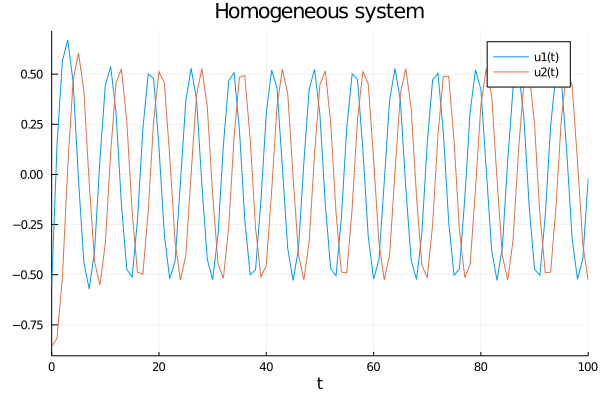

In [15]:
sol = node(node.u₀);
p1 = plot(sol, title="Homogeneous system")

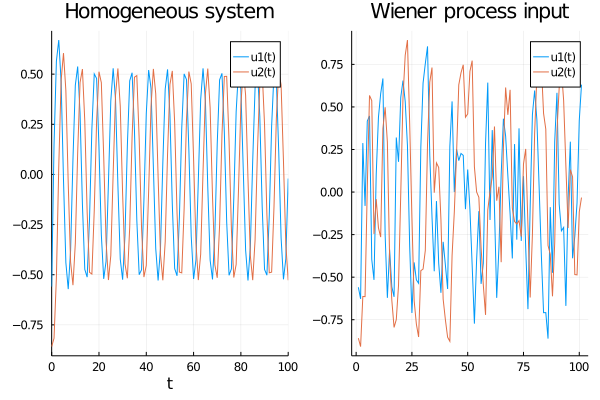

In [16]:
sol = node(cpt);
plot(p1, plot(permutedims(Array(sol)[:,1,:]), label = ["u1(t)" "u2(t)"], title = "Wiener process input") )

# Testing training w/t loss function $||\mathbf{u}(t)||^2$

In [6]:
function predict_neuralode(p)
  Array(node(spt, p=p))
end

function loss_neuralode(p)
    pred = predict_neuralode(p)
    loss = sum(abs2, pred .- 0.0)
    return loss, pred
end
callback = function (p, l, pred; doplot = true)
  display(l)
  # plot current prediction against data
#  if doplot
#    display(plot( permutedims(pred[:,1,:]), label = ""))
#  end
  return false
end

#53 (generic function with 1 method)

129.400125291755

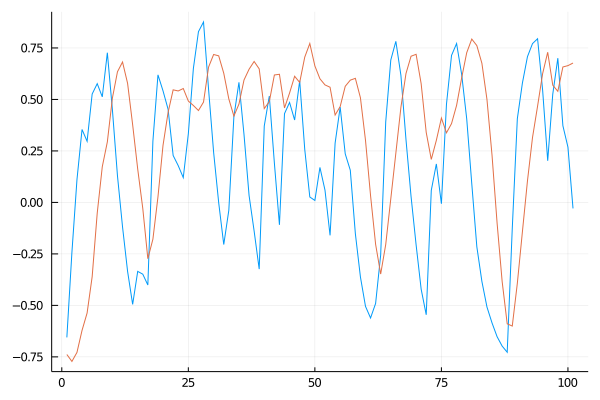

104.55575217035388

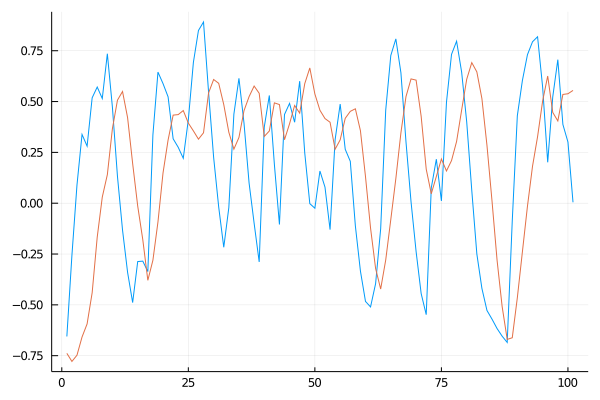

loss: 105:   2%|▊                                       |  ETA: 0:01:17

89.34329250560374

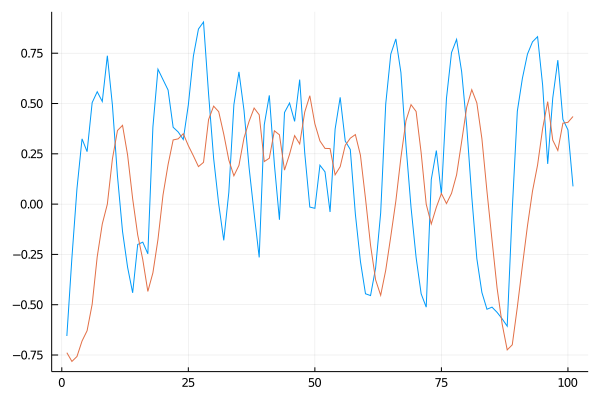

81.22078199167048

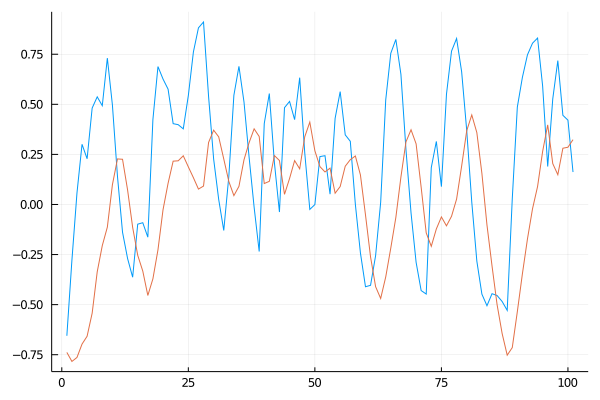

loss: 81.2:   4%|█▌                                     |  ETA: 0:00:57

75.96260092419632

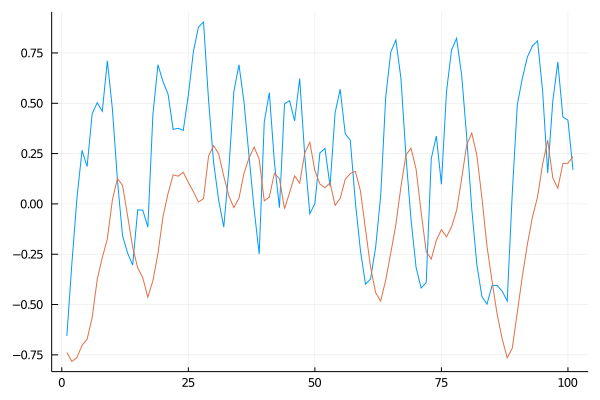

loss: 76:   5%|██                                       |  ETA: 0:00:51

70.57258875252097

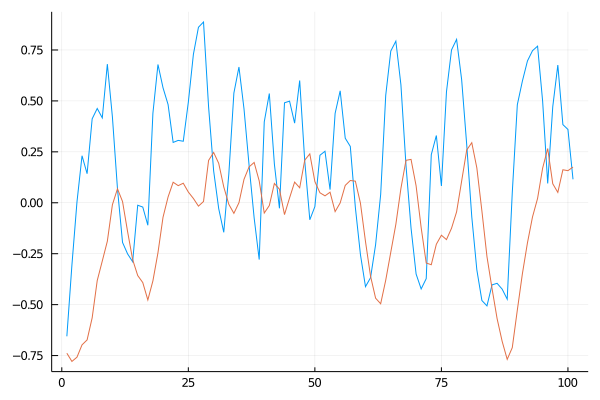

loss: 70.6:   6%|██▍                                    |  ETA: 0:00:46

64.65532769763597

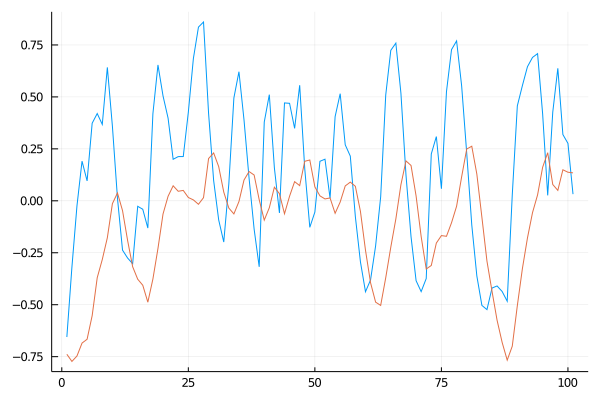

loss: 64.7:   7%|██▊                                    |  ETA: 0:00:44

58.89082073466694

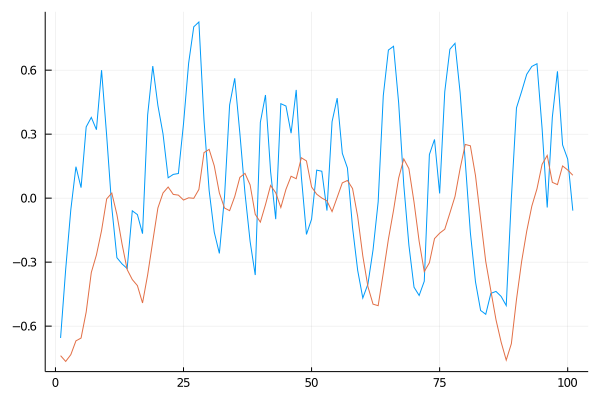

loss: 58.9:   8%|███▏                                   |  ETA: 0:00:41

53.87140690820079

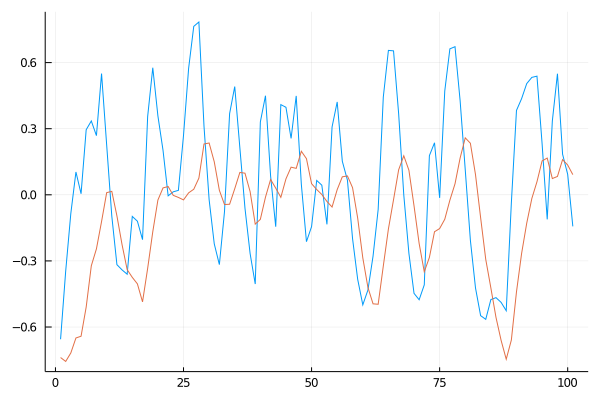

loss: 53.9:   9%|███▌                                   |  ETA: 0:00:39

49.92770653168174

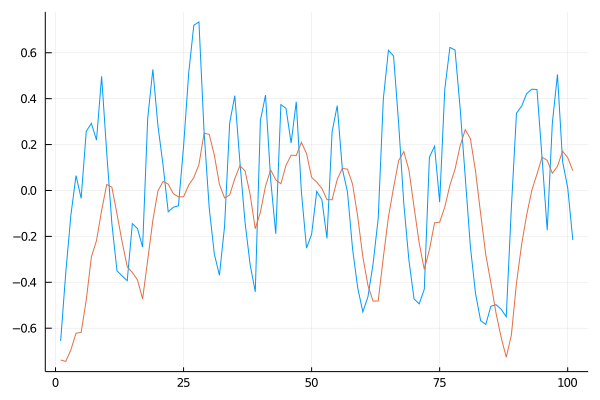

loss: 49.9:  10%|███▉                                   |  ETA: 0:00:38

47.20907668629016

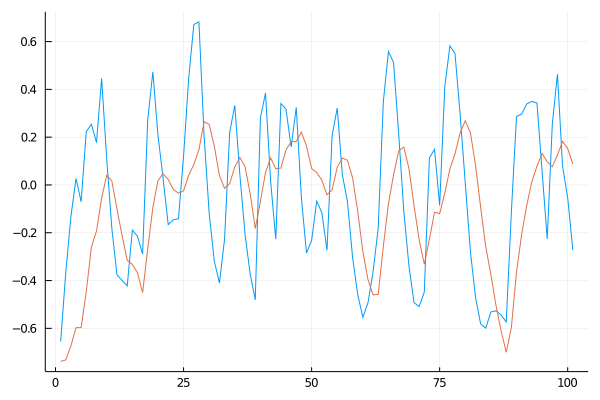

loss: 47.2:  11%|████▎                                  |  ETA: 0:00:36

45.35511980345034

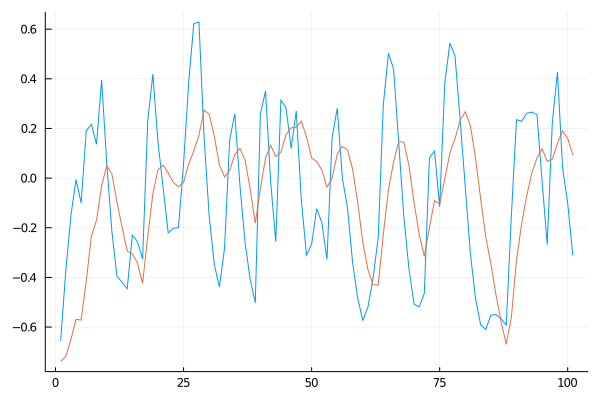

loss: 45.4:  12%|████▋                                  |  ETA: 0:00:36

43.89297160321543

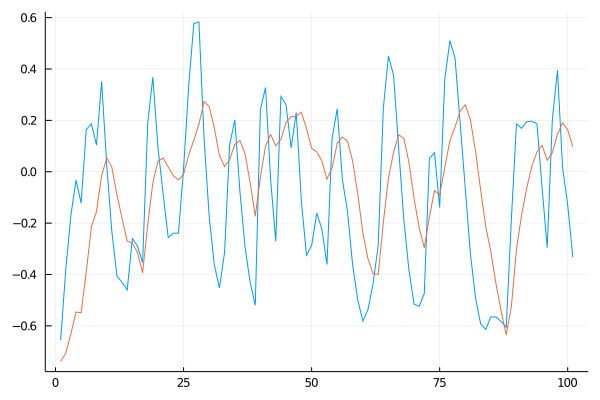

loss: 43.9:  13%|█████▏                                 |  ETA: 0:00:34

42.13502880492748

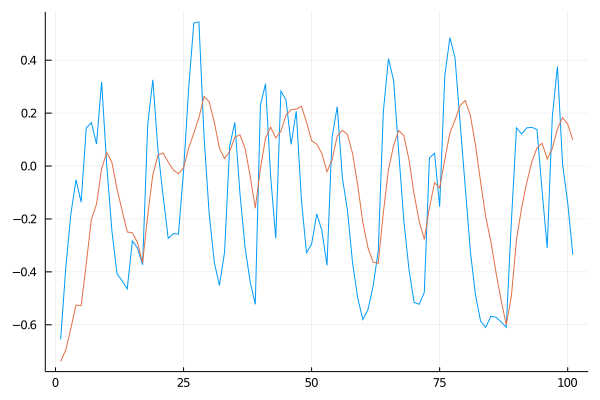

loss: 42.1:  14%|█████▌                                 |  ETA: 0:00:34

39.66311262052466

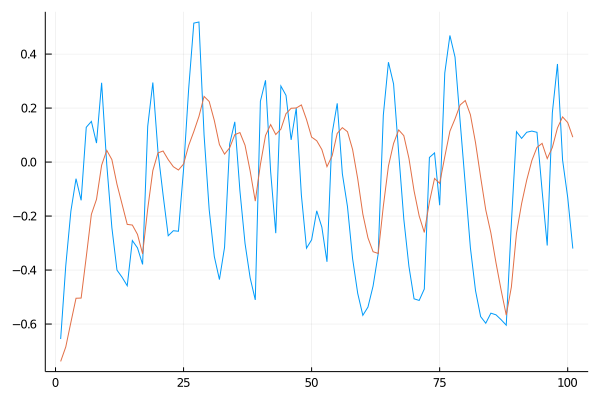

loss: 39.7:  15%|█████▉                                 |  ETA: 0:00:33

36.53805823439539

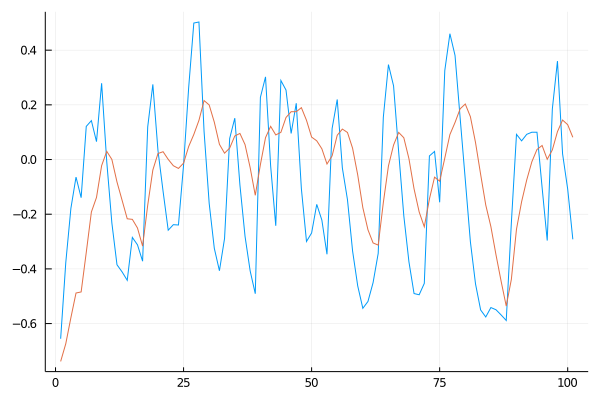

loss: 36.5:  16%|██████▎                                |  ETA: 0:00:32

33.14787841547863

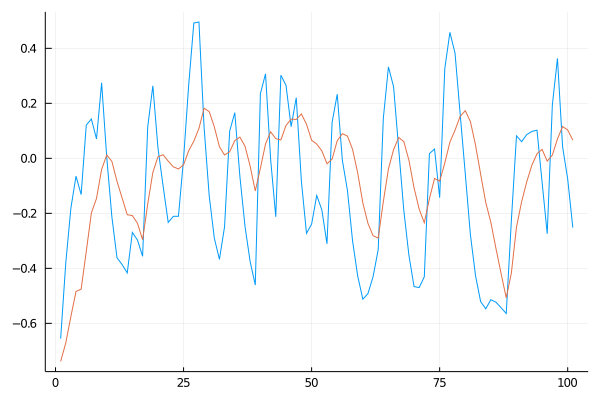

loss: 33.1:  17%|██████▋                                |  ETA: 0:00:31

29.88249604900081

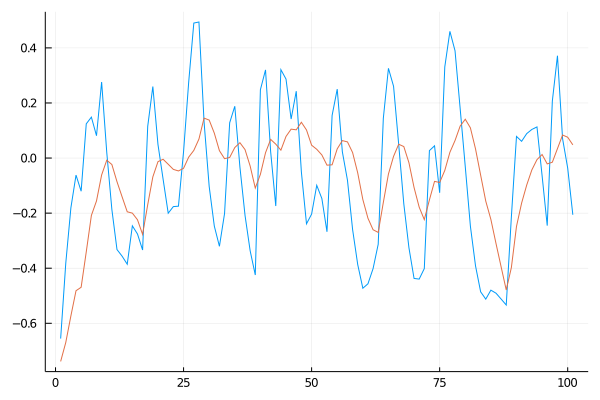

loss: 29.9:  18%|███████                                |  ETA: 0:00:31

27.11863196322675

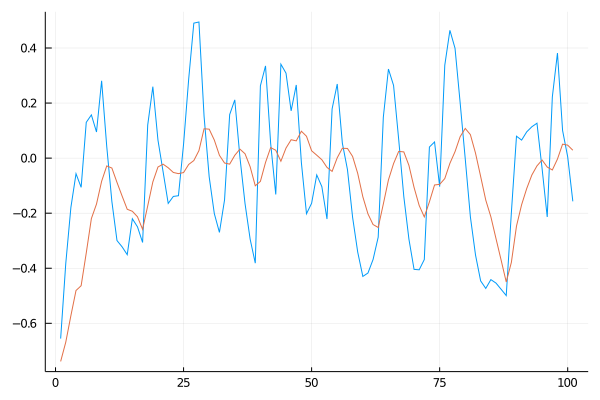

loss: 27.1:  19%|███████▍                               |  ETA: 0:00:30

25.001771747132256

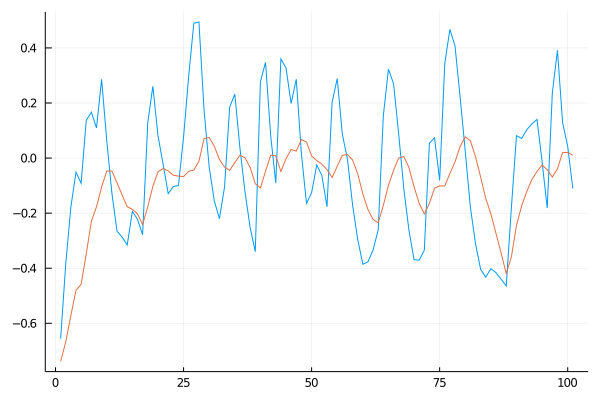

loss: 25:  20%|████████▎                                |  ETA: 0:00:29

23.41202087011408

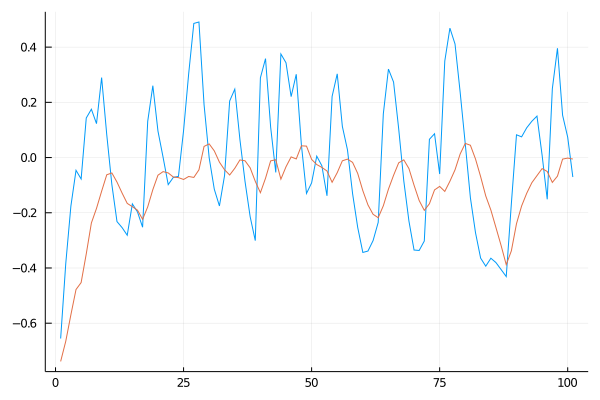

loss: 23.4:  21%|████████▎                              |  ETA: 0:00:28

22.05525889725669

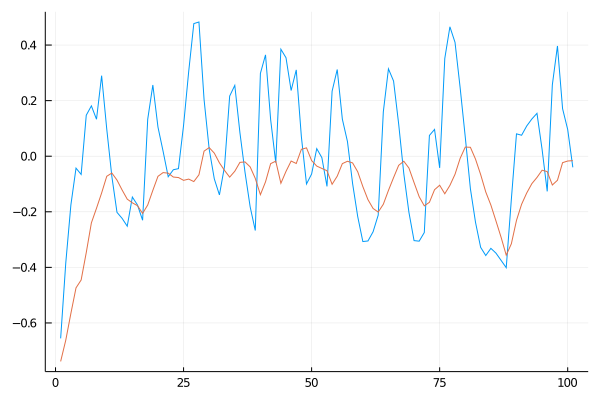

loss: 22.1:  22%|████████▋                              |  ETA: 0:00:28

20.645967500841092

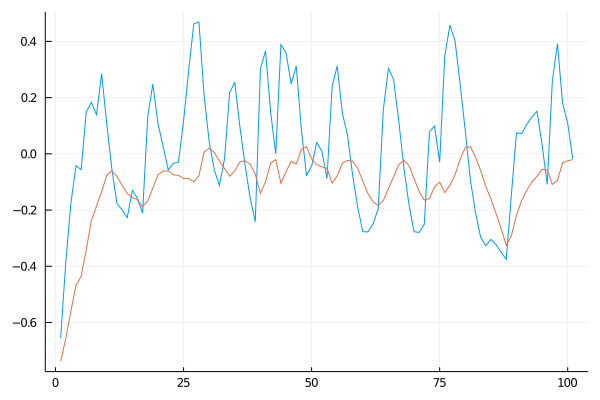

loss: 20.6:  23%|█████████                              |  ETA: 0:00:27

19.018747274086497

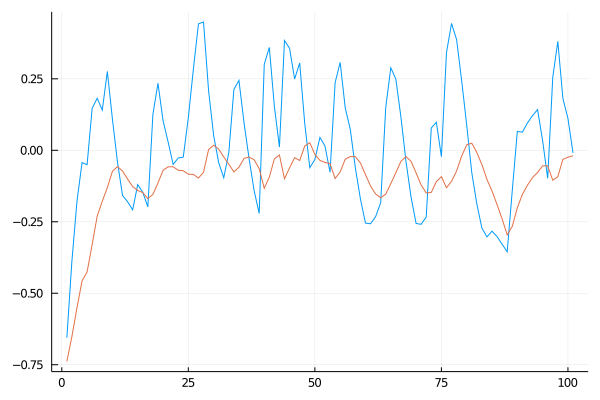

loss: 19:  24%|█████████▉                               |  ETA: 0:00:26

17.195145310456876

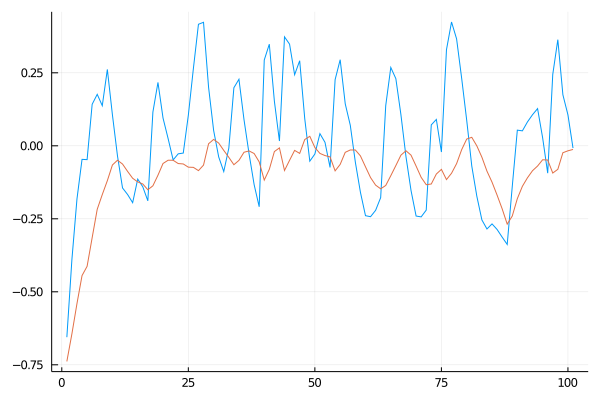

loss: 17.2:  25%|█████████▊                             |  ETA: 0:00:26

15.32317460437162

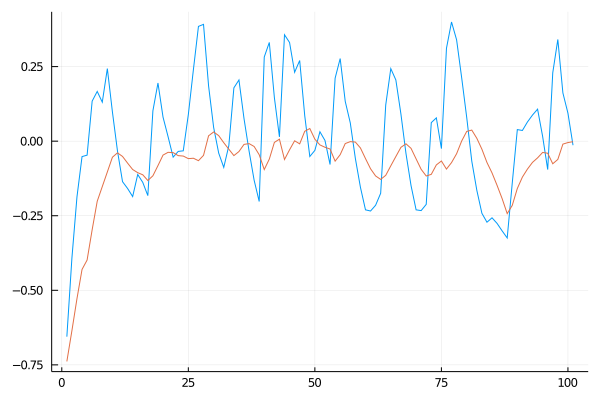

loss: 15.3:  26%|██████████▏                            |  ETA: 0:00:25

13.542716810856504

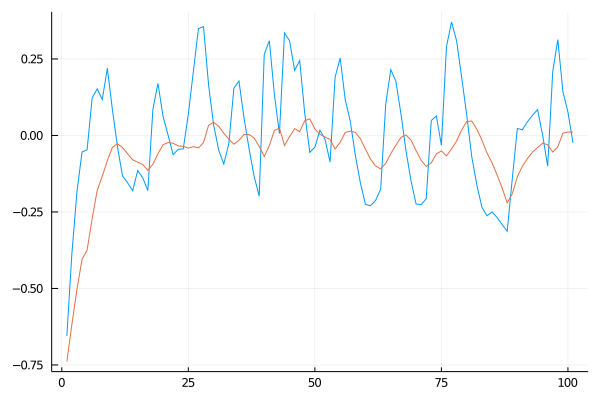

loss: 13.5:  27%|██████████▌                            |  ETA: 0:00:25

12.121857124462771

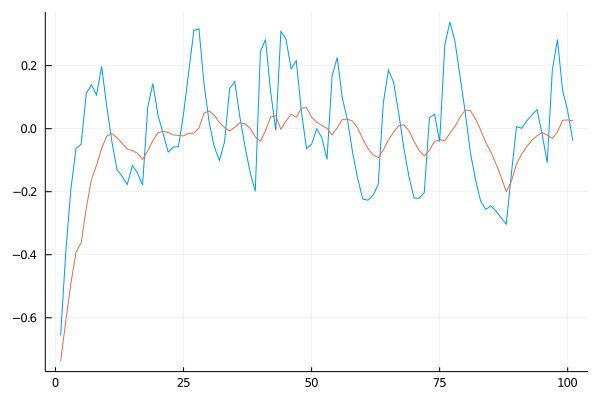

loss: 12.1:  28%|██████████▉                            |  ETA: 0:00:24

11.066212443559575

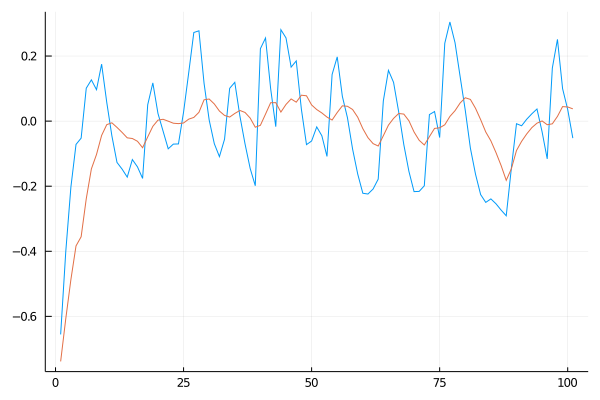

loss: 11.1:  29%|███████████▎                           |  ETA: 0:00:24

10.249216458094171

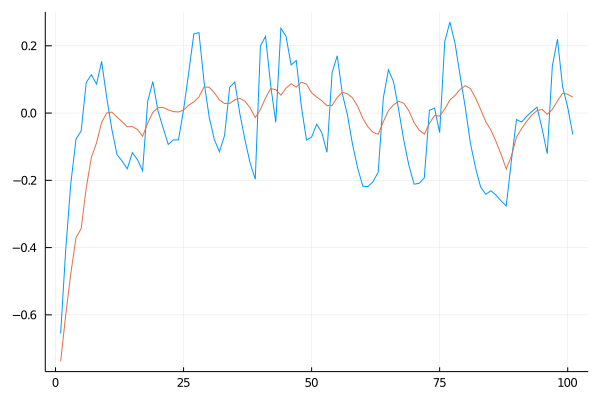

loss: 10.2:  30%|███████████▊                           |  ETA: 0:00:23

9.536741779192004

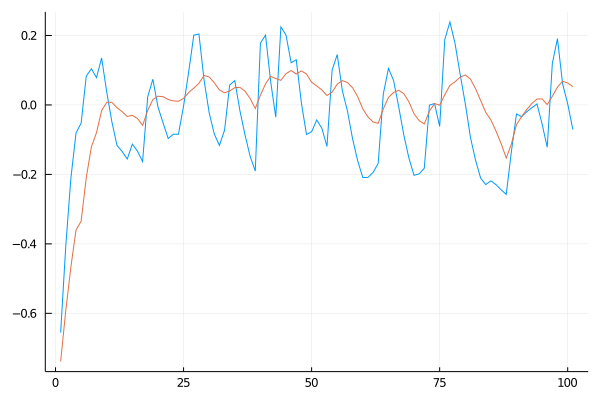

loss: 9.54:  31%|████████████▏                          |  ETA: 0:00:22

8.787593749294983

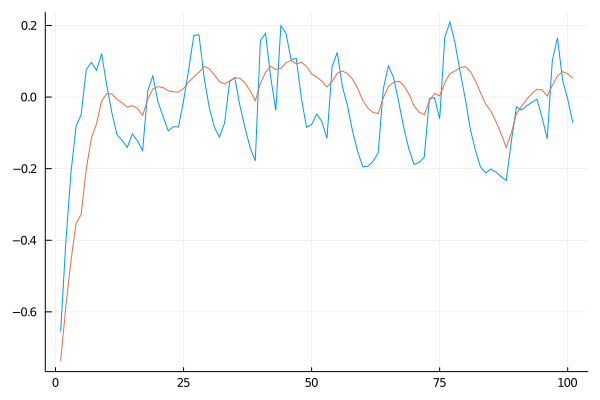

loss: 8.79:  32%|████████████▌                          |  ETA: 0:00:22

7.951446561321161

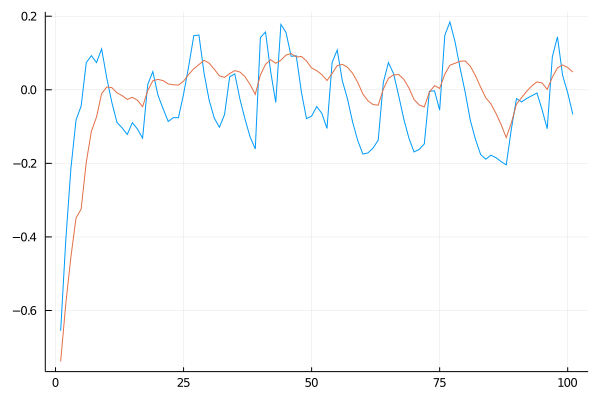

loss: 7.95:  33%|████████████▉                          |  ETA: 0:00:22

7.091154884951312

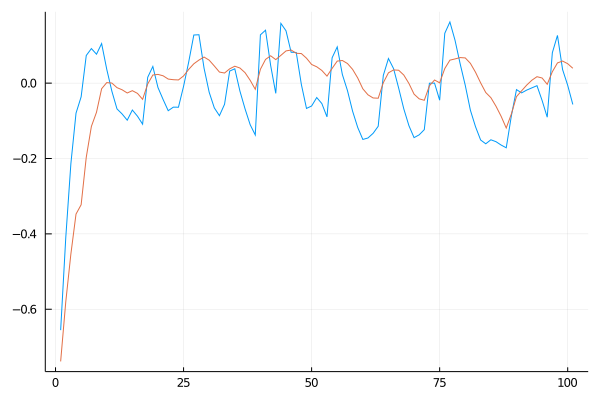

loss: 7.09:  34%|█████████████▎                         |  ETA: 0:00:21

6.323394977517022

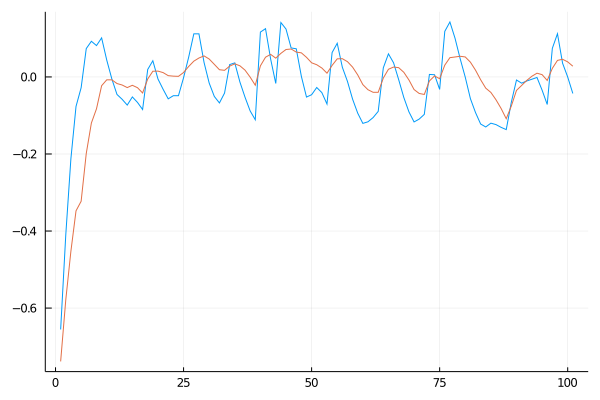

loss: 6.32:  35%|█████████████▋                         |  ETA: 0:00:21

5.753463850282796

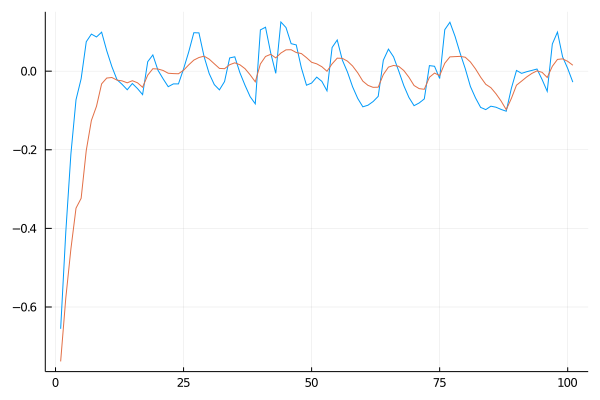

loss: 5.75:  36%|██████████████                         |  ETA: 0:00:20

5.410128878760599

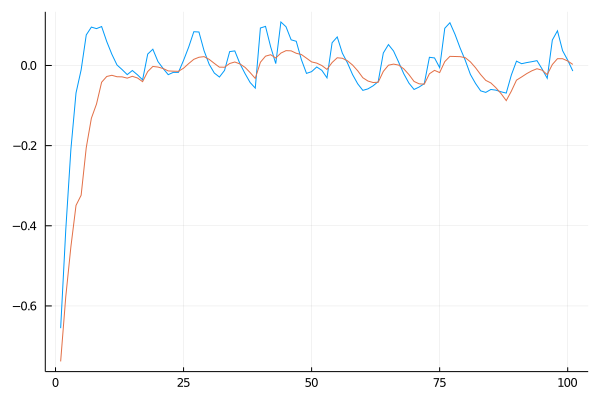

loss: 5.41:  37%|██████████████▍                        |  ETA: 0:00:20

5.242827043921983

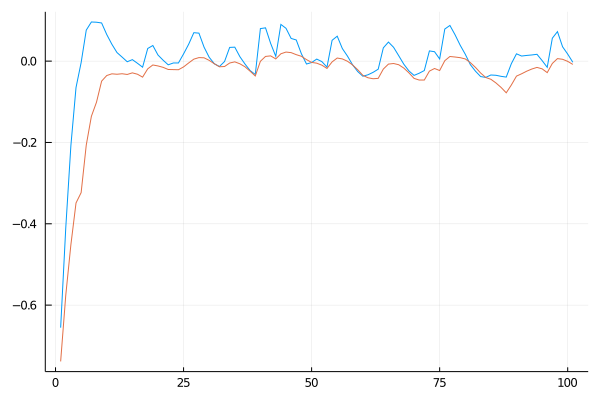

loss: 5.24:  38%|██████████████▉                        |  ETA: 0:00:19

5.1587966724114125

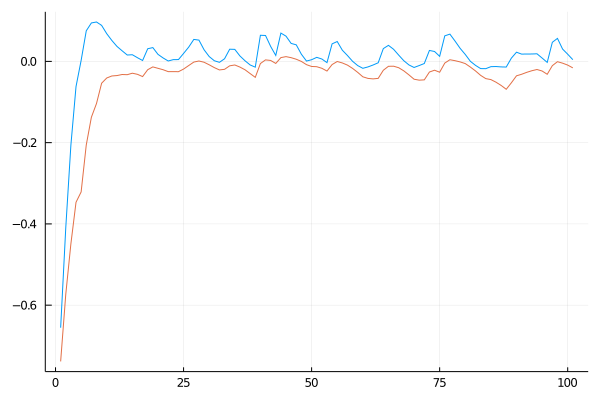

loss: 5.16:  39%|███████████████▎                       |  ETA: 0:00:19

5.077525169590071

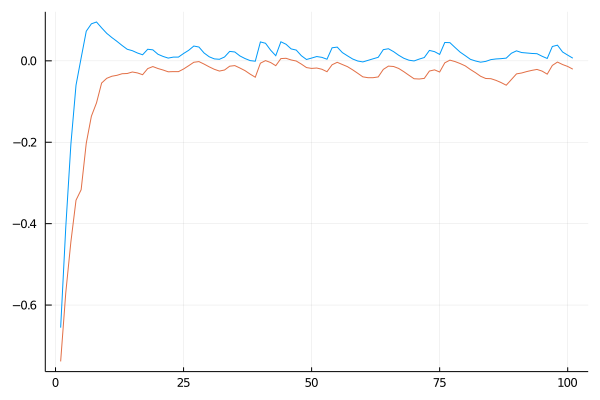

loss: 5.08:  40%|███████████████▋                       |  ETA: 0:00:18

4.968969014488181

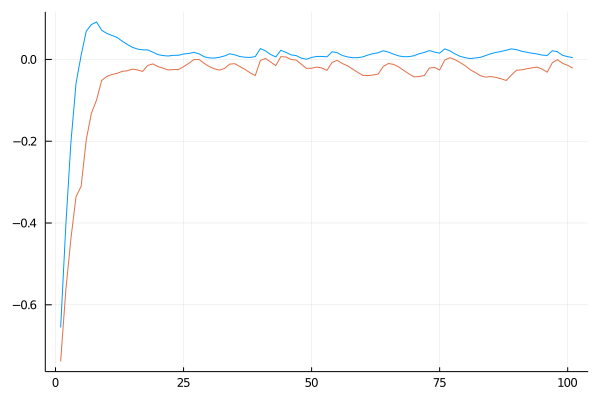

loss: 4.97:  41%|████████████████                       |  ETA: 0:00:18

4.849858700041384

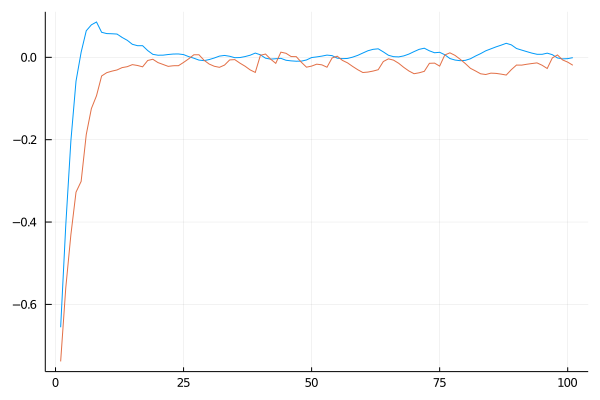

loss: 4.85:  42%|████████████████▍                      |  ETA: 0:00:18

4.759538534248706

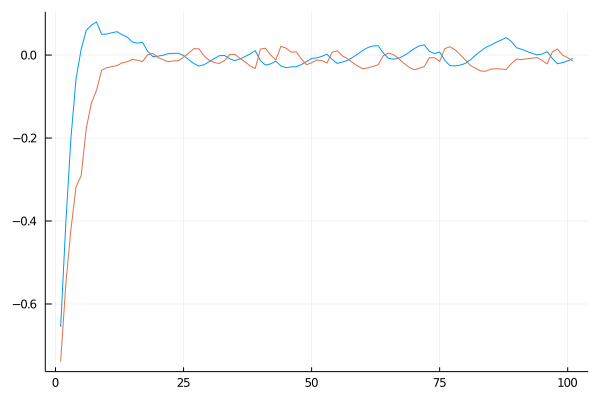

loss: 4.76:  43%|████████████████▊                      |  ETA: 0:00:17

4.723112332651997

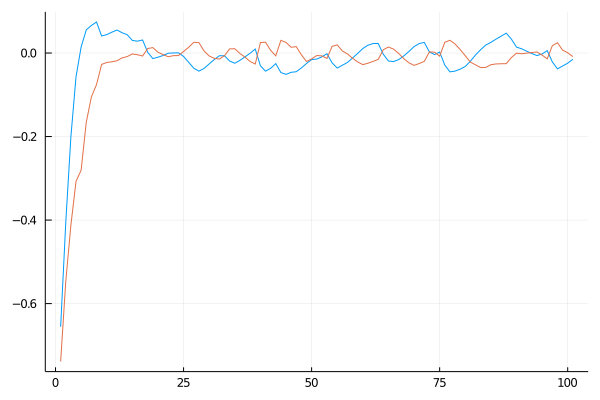

loss: 4.72:  44%|█████████████████▏                     |  ETA: 0:00:17

4.732388608160087

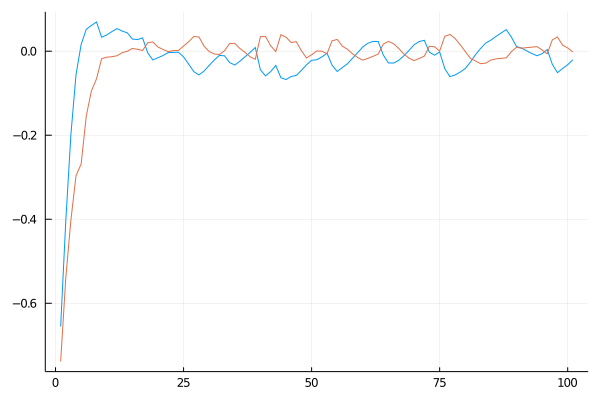

loss: 4.73:  45%|█████████████████▌                     |  ETA: 0:00:16

4.759371034376985

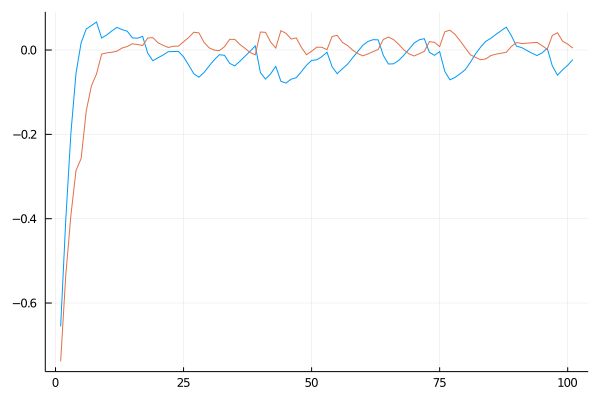

loss: 4.76:  46%|██████████████████                     |  ETA: 0:00:16

4.774794595409768

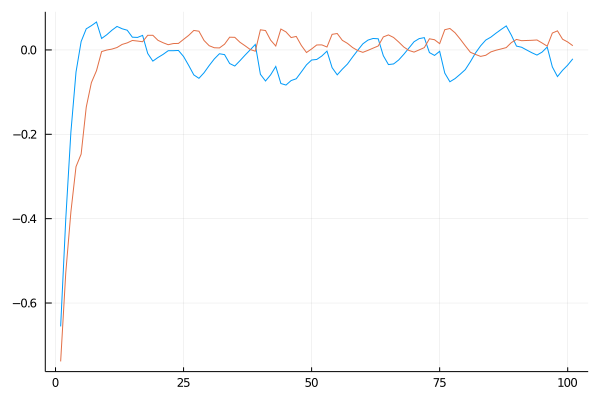

loss: 4.77:  47%|██████████████████▍                    |  ETA: 0:00:16

4.7668308285650305

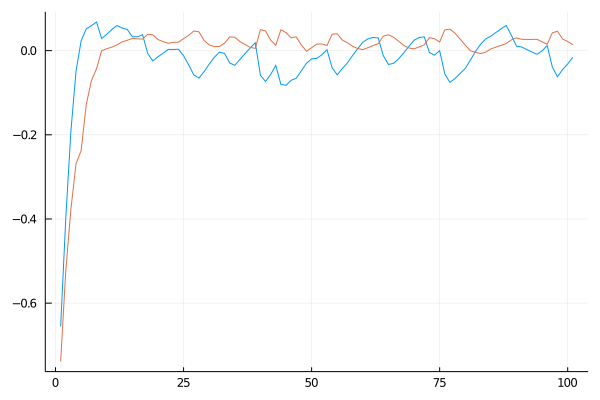

loss: 4.77:  48%|██████████████████▊                    |  ETA: 0:00:15

4.747439187340908

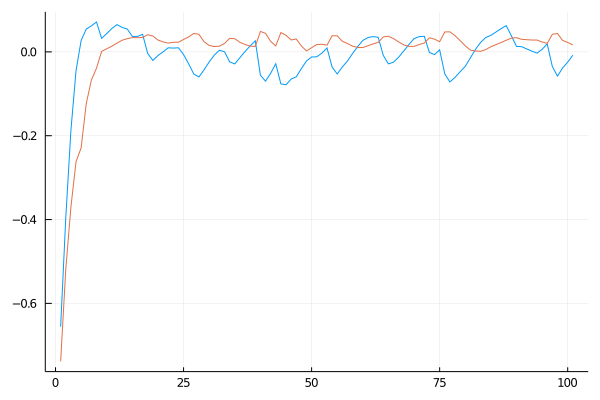

loss: 4.75:  49%|███████████████████▏                   |  ETA: 0:00:15

4.736015537792761

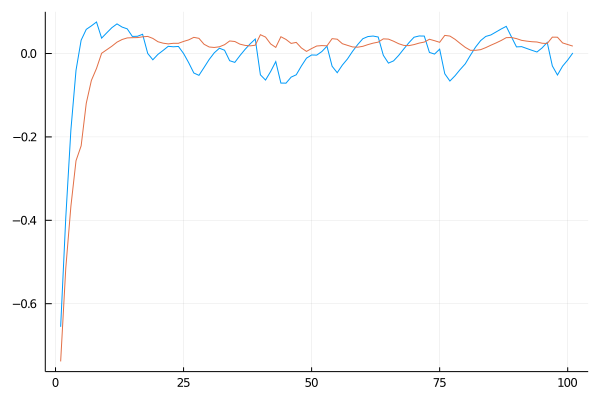

loss: 4.74:  50%|███████████████████▌                   |  ETA: 0:00:15

4.7387373005705395

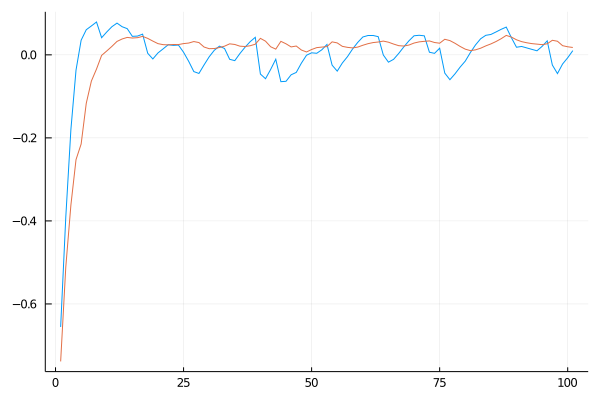

loss: 4.74:  51%|███████████████████▉                   |  ETA: 0:00:14

4.746211747230481

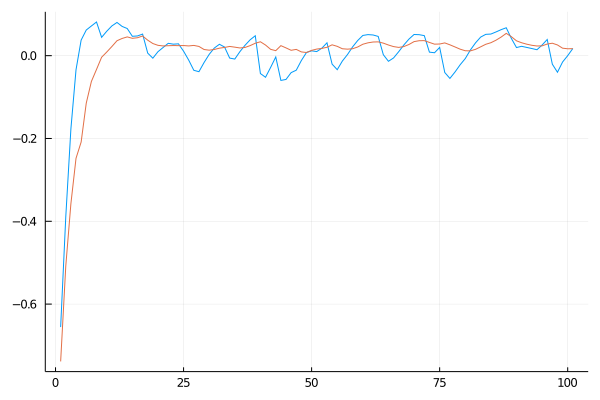

loss: 4.75:  52%|████████████████████▎                  |  ETA: 0:00:14

4.740297752262572

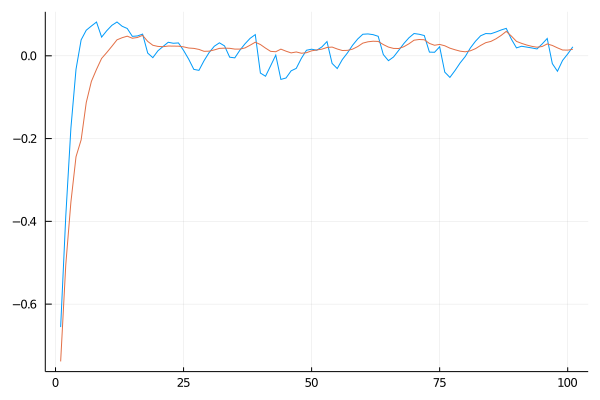

loss: 4.74:  53%|████████████████████▋                  |  ETA: 0:00:13

4.705823522755623

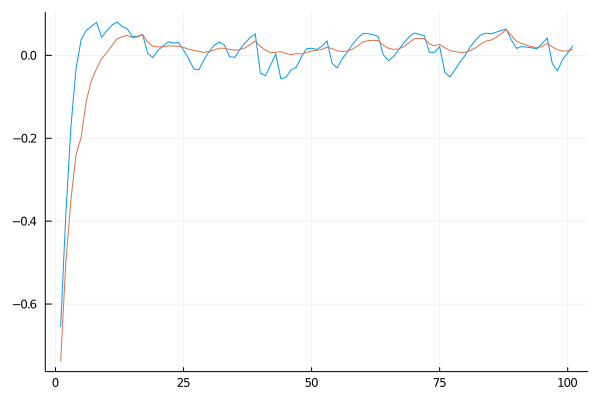

loss: 4.71:  54%|█████████████████████                  |  ETA: 0:00:13

4.646120258135435

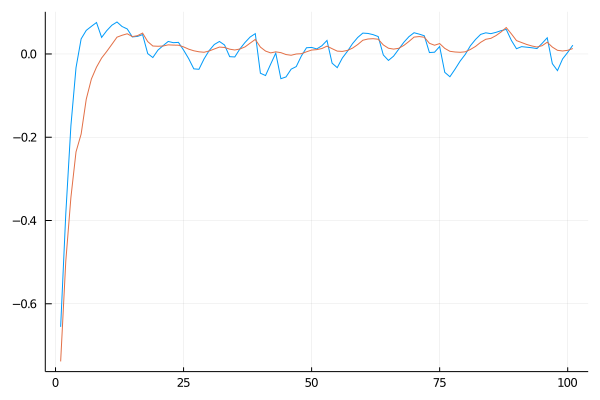

loss: 4.65:  55%|█████████████████████▌                 |  ETA: 0:00:13

4.574528006709591

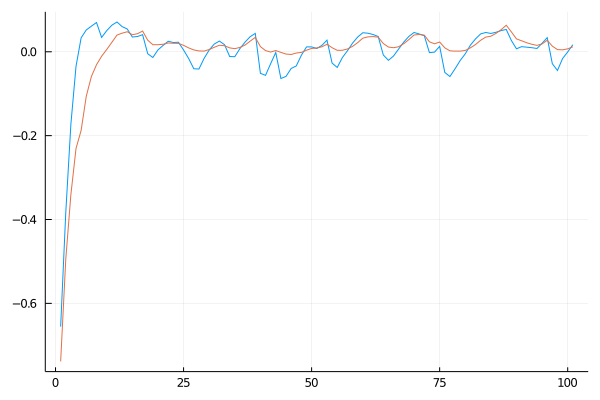

loss: 4.57:  56%|█████████████████████▉                 |  ETA: 0:00:13

4.509725116320042

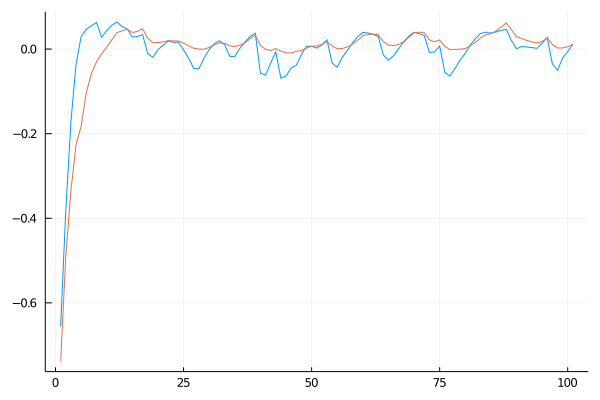

loss: 4.51:  57%|██████████████████████▎                |  ETA: 0:00:12

4.4630101989982

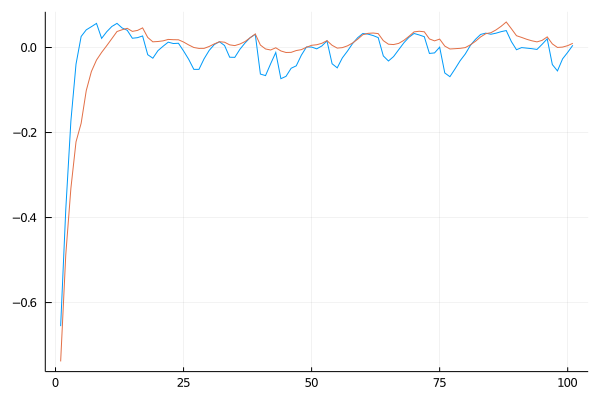

loss: 4.46:  58%|██████████████████████▋                |  ETA: 0:00:12

4.430226573377966

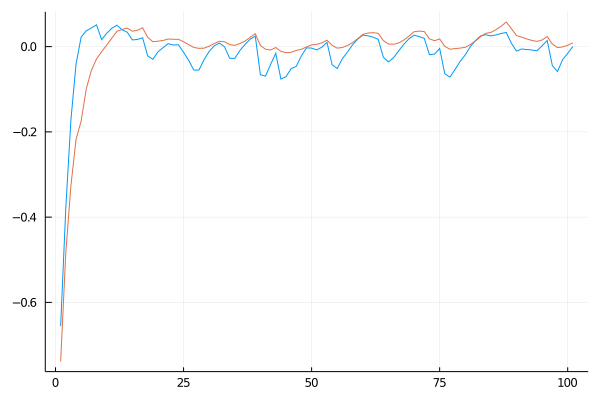

loss: 4.43:  59%|███████████████████████                |  ETA: 0:00:11

4.400924561495518

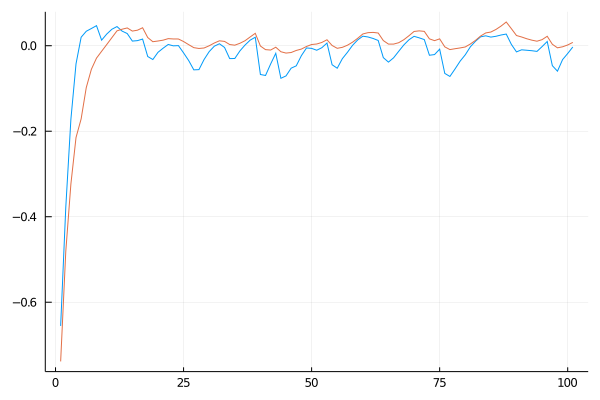

loss: 4.4:  60%|████████████████████████                |  ETA: 0:00:11

4.363566366715805

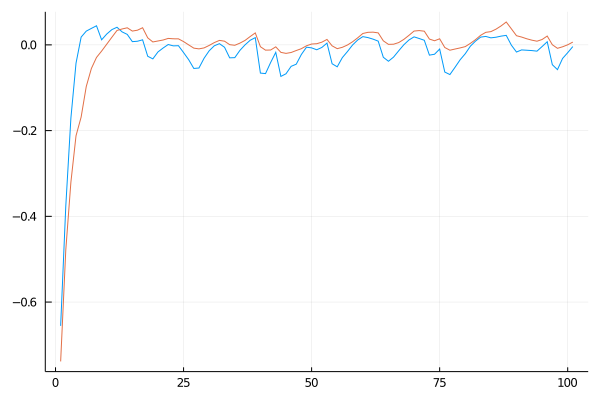

loss: 4.36:  61%|███████████████████████▊               |  ETA: 0:00:11

4.316370662385957

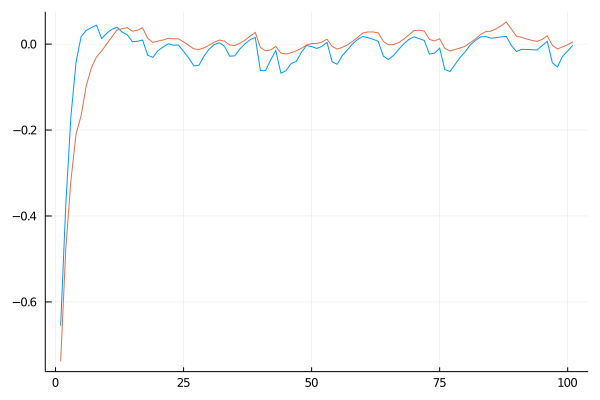

loss: 4.32:  62%|████████████████████████▏              |  ETA: 0:00:10

4.264863344321016

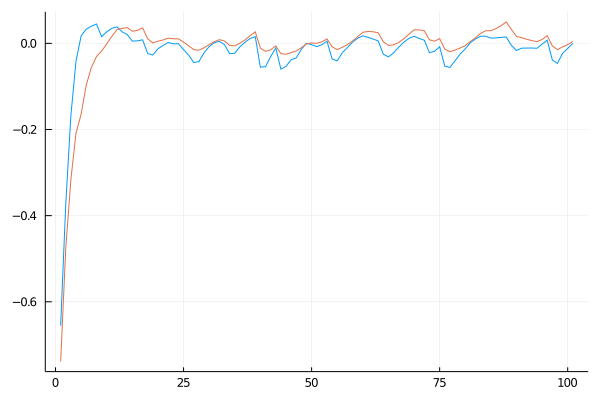

loss: 4.26:  63%|████████████████████████▋              |  ETA: 0:00:10

4.216612014061503

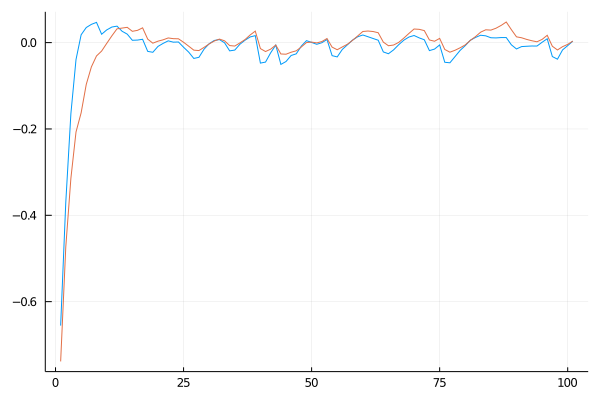

loss: 4.22:  64%|█████████████████████████              |  ETA: 0:00:10

4.1755165051512755

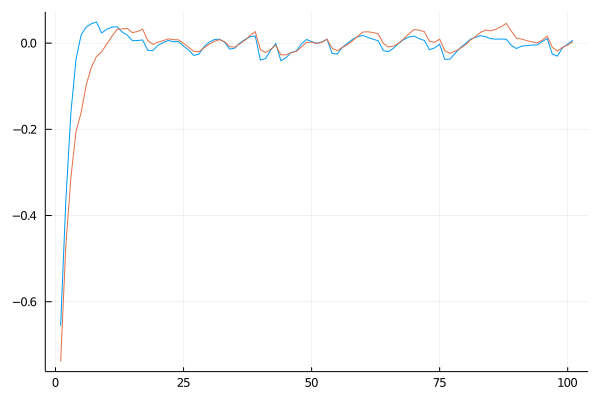

loss: 4.18:  65%|█████████████████████████▍             |  ETA: 0:00:10

4.140169595814211

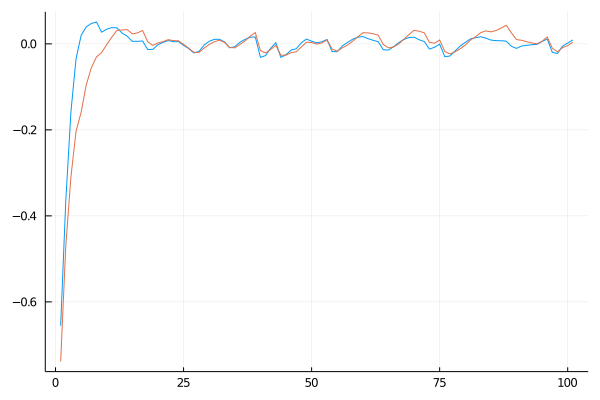

loss: 4.14:  66%|█████████████████████████▊             |  ETA: 0:00:09

4.1060587095155565

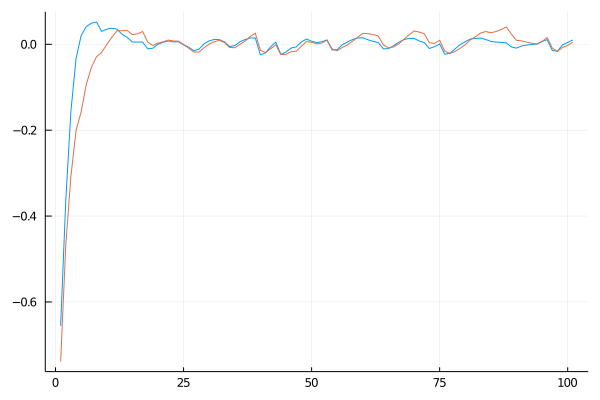

loss: 4.11:  67%|██████████████████████████▏            |  ETA: 0:00:09

4.070784773010296

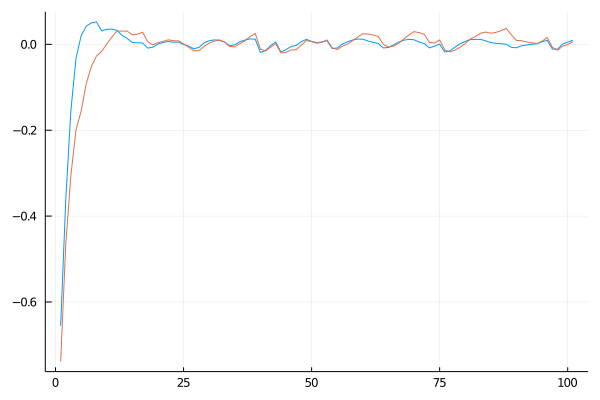

loss: 4.07:  68%|██████████████████████████▌            |  ETA: 0:00:09

4.035978914068124

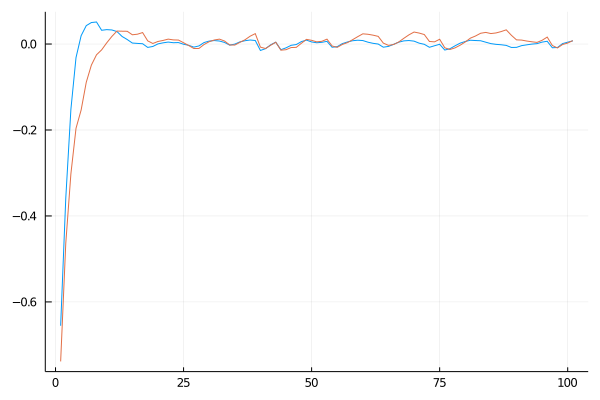

loss: 4.04:  69%|██████████████████████████▉            |  ETA: 0:00:08

4.0048912389494005

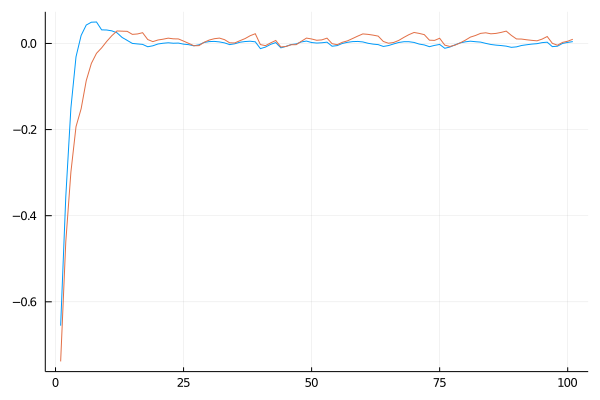

loss: 4:  70%|█████████████████████████████▍            |  ETA: 0:00:08

3.9805396972398706

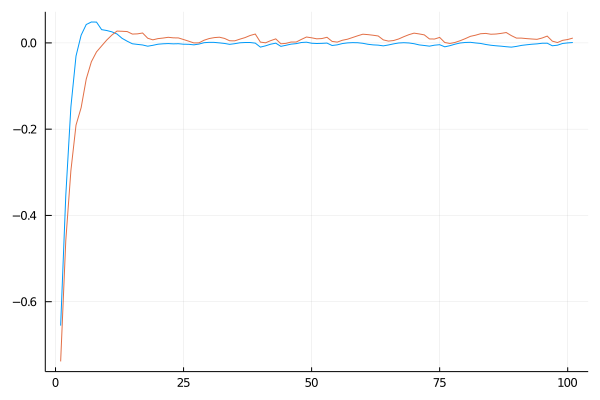

loss: 3.98:  71%|███████████████████████████▊           |  ETA: 0:00:08

3.9612861739154104

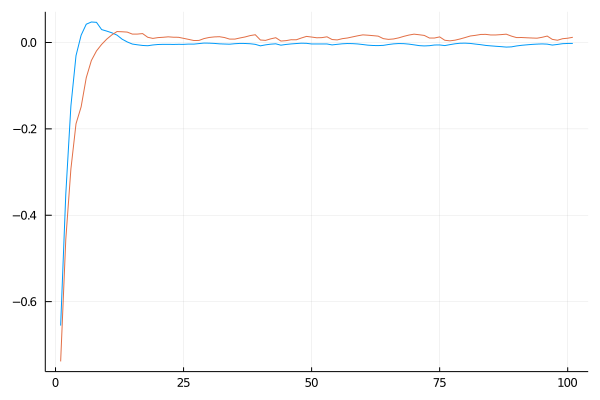

loss: 3.96:  72%|████████████████████████████▏          |  ETA: 0:00:08

3.945015389019392

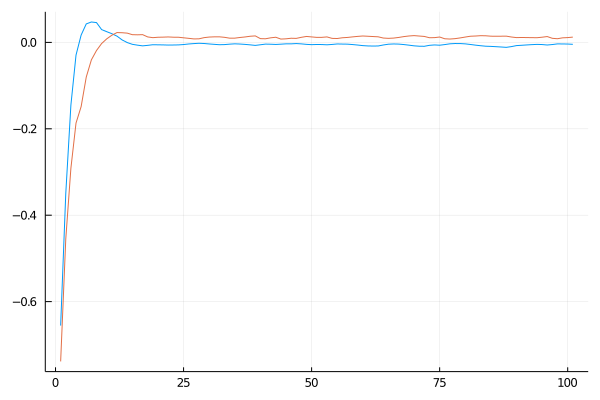

loss: 3.95:  73%|████████████████████████████▌          |  ETA: 0:00:07

3.927338095253414

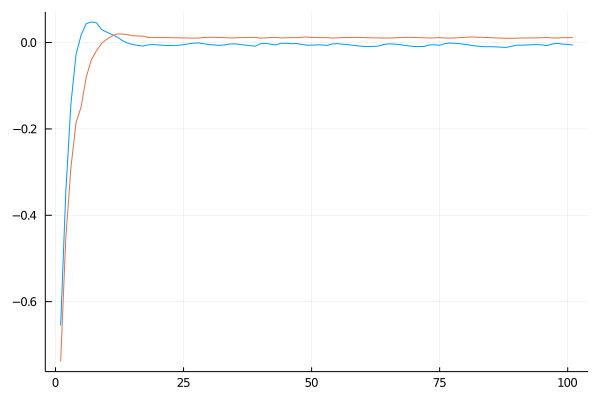

loss: 3.93:  74%|████████████████████████████▉          |  ETA: 0:00:07

3.909139443326151

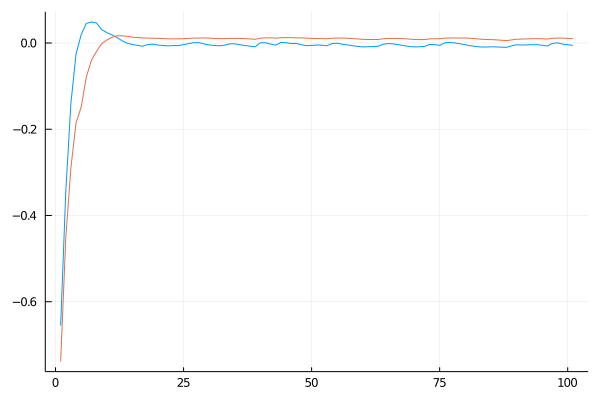

loss: 3.91:  75%|█████████████████████████████▎         |  ETA: 0:00:07

3.8919335451140773

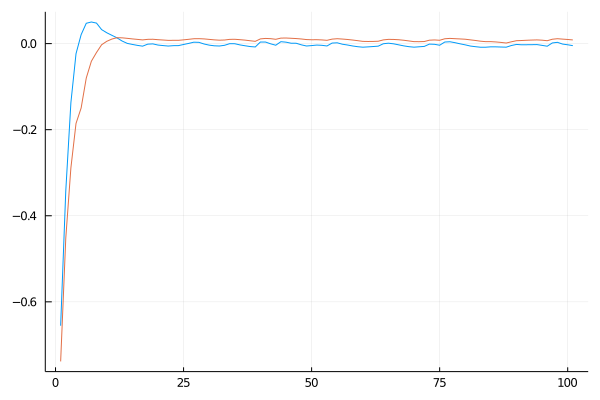

loss: 3.89:  76%|█████████████████████████████▋         |  ETA: 0:00:06

3.878918760807174

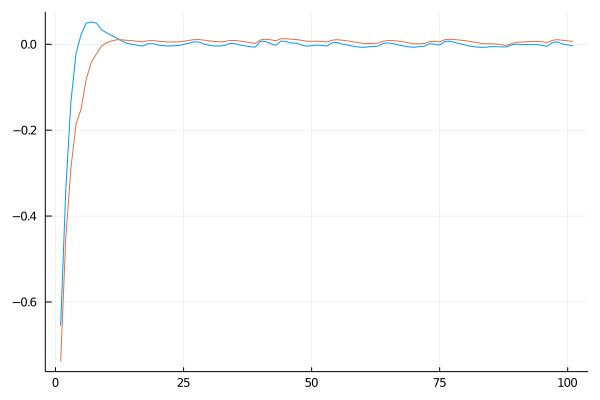

loss: 3.88:  77%|██████████████████████████████         |  ETA: 0:00:06

3.8691808210269256

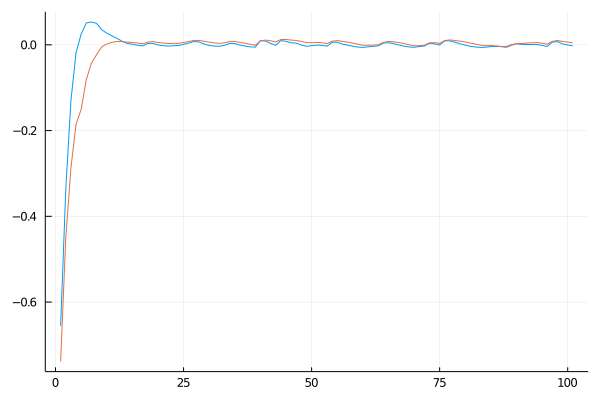

loss: 3.87:  78%|██████████████████████████████▍        |  ETA: 0:00:06

3.8623257791518117

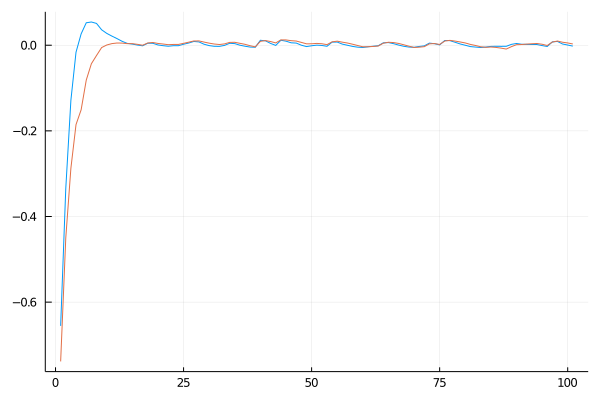

loss: 3.86:  79%|██████████████████████████████▊        |  ETA: 0:00:06

3.8556160319407544

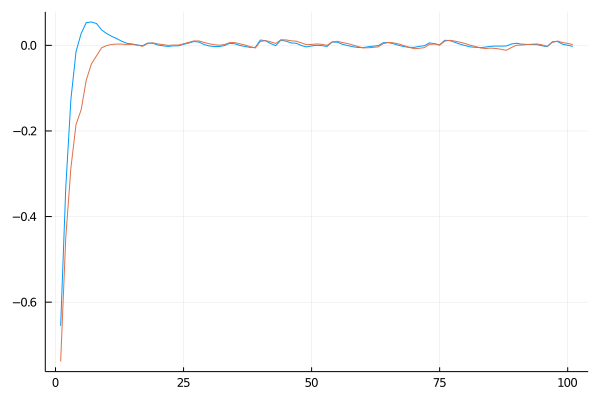

loss: 3.86:  80%|███████████████████████████████▎       |  ETA: 0:00:05

3.846629158445478

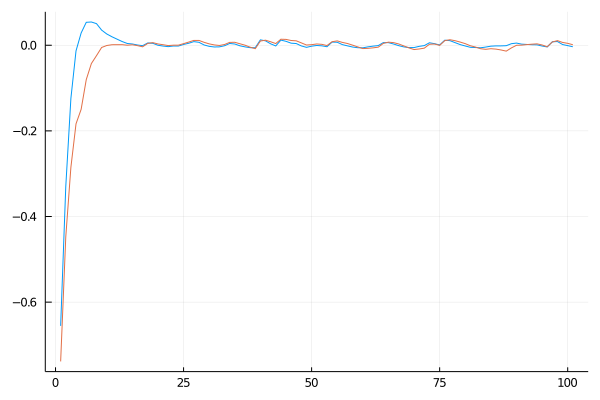

loss: 3.85:  81%|███████████████████████████████▋       |  ETA: 0:00:05

3.836839059402826

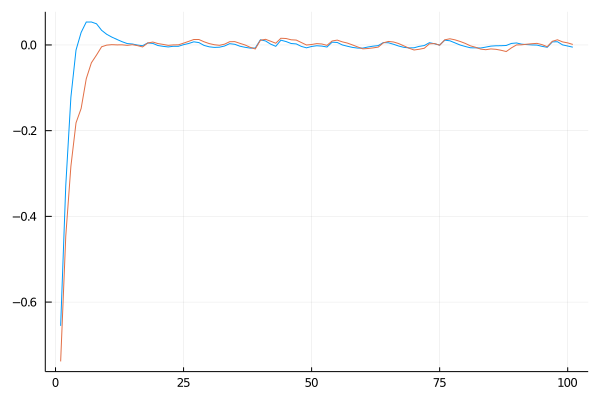

loss: 3.84:  82%|████████████████████████████████       |  ETA: 0:00:05

3.8280727125264926

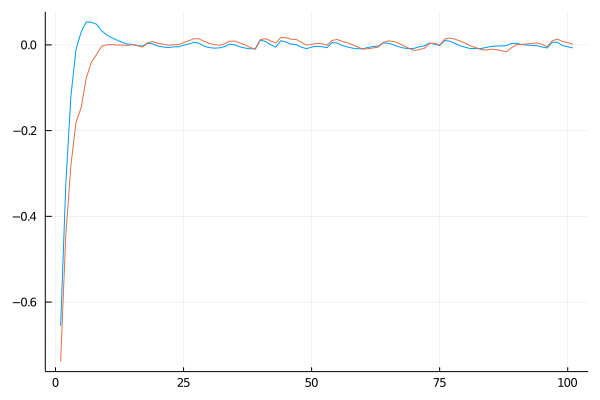

loss: 3.83:  83%|████████████████████████████████▍      |  ETA: 0:00:04

3.8185157882114966

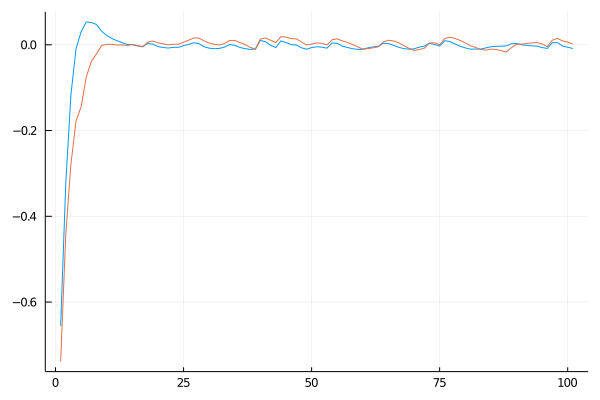

loss: 3.82:  84%|████████████████████████████████▊      |  ETA: 0:00:04

3.809304818908178

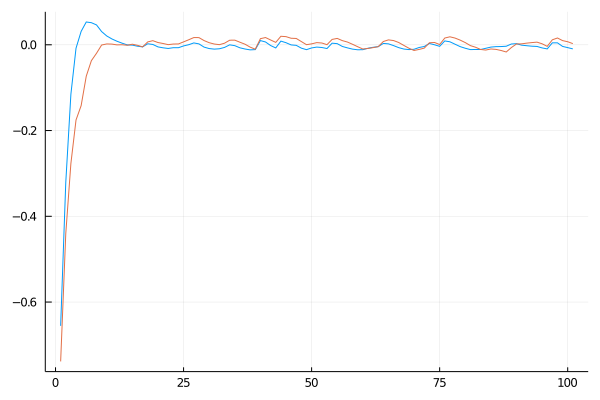

loss: 3.81:  85%|█████████████████████████████████▏     |  ETA: 0:00:04

3.798768681508408

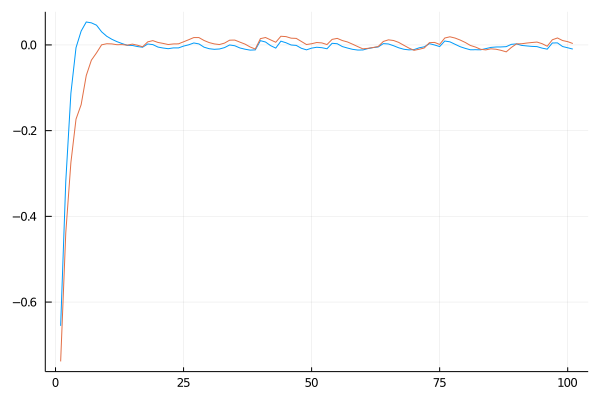

loss: 3.8:  86%|██████████████████████████████████▍     |  ETA: 0:00:04

3.7869868383872474

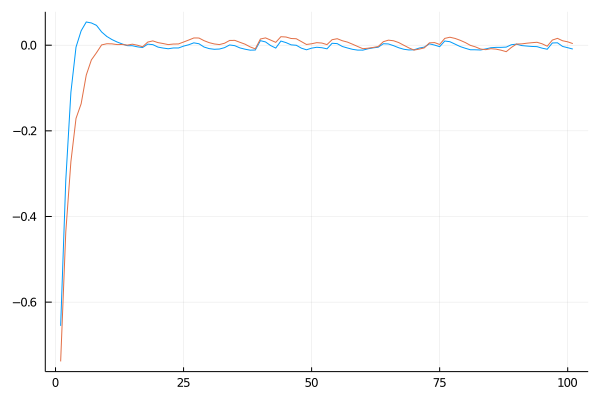

loss: 3.79:  87%|█████████████████████████████████▉     |  ETA: 0:00:03

3.775002699199133

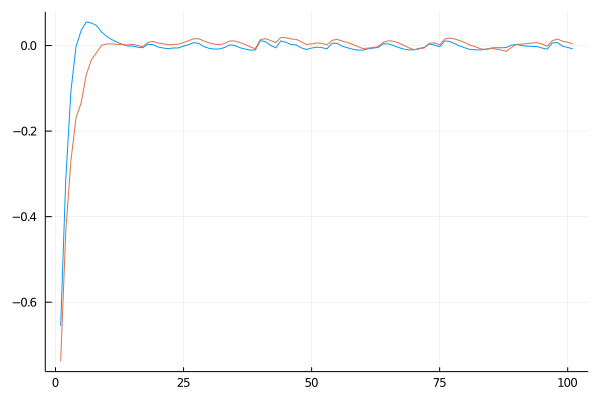

loss: 3.78:  88%|██████████████████████████████████▍    |  ETA: 0:00:03

3.7643123394459903

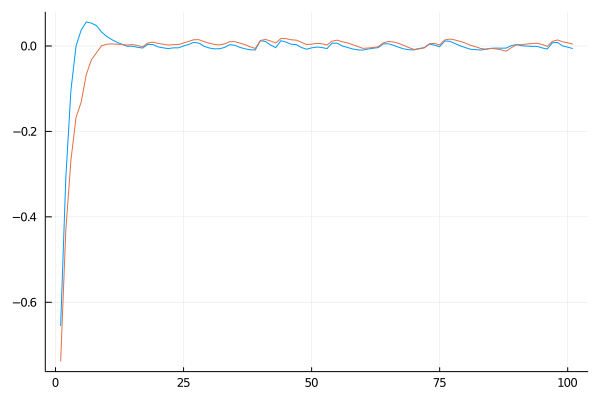

loss: 3.76:  89%|██████████████████████████████████▊    |  ETA: 0:00:03

3.7556770747991535

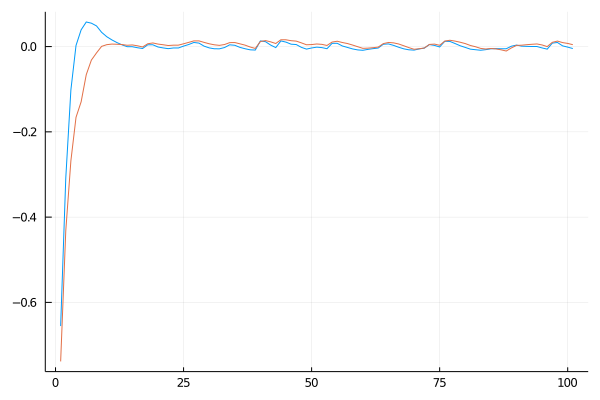

loss: 3.76:  90%|███████████████████████████████████▏   |  ETA: 0:00:03

3.74652959625057

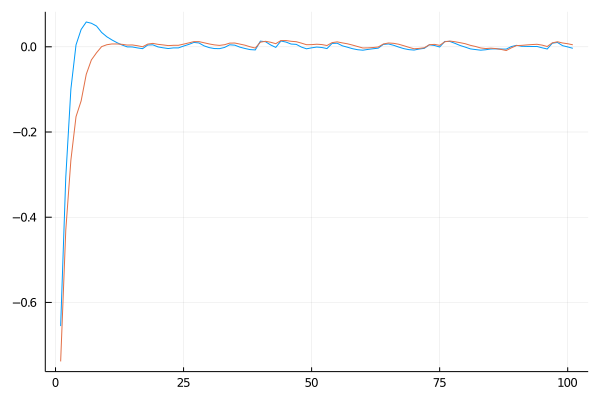

loss: 3.75:  91%|███████████████████████████████████▌   |  ETA: 0:00:02

3.736824548231518

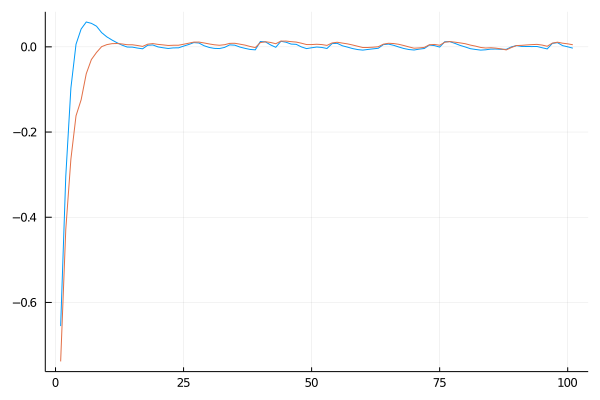

loss: 3.74:  92%|███████████████████████████████████▉   |  ETA: 0:00:02

3.7271723571598065

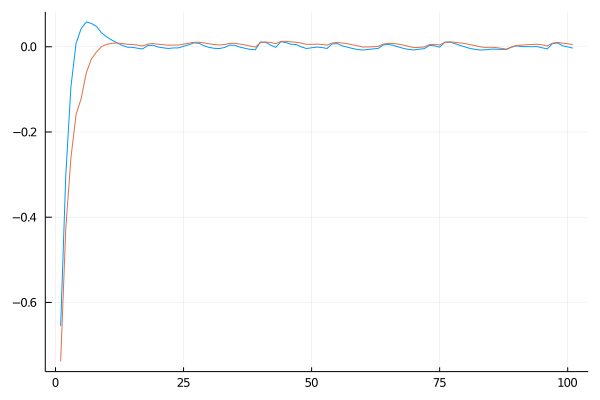

loss: 3.73:  93%|████████████████████████████████████▎  |  ETA: 0:00:02

3.717317663609706

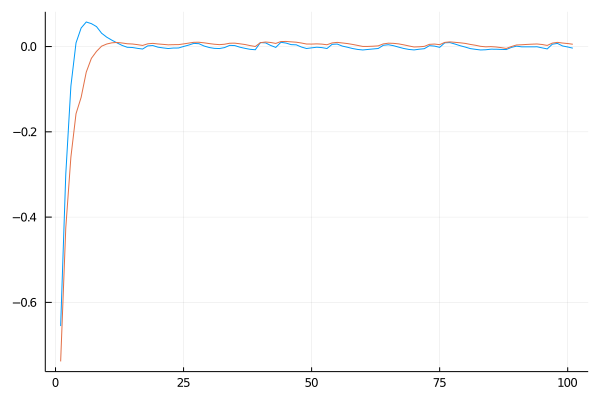

loss: 3.72:  94%|████████████████████████████████████▋  |  ETA: 0:00:02

3.707871314166046

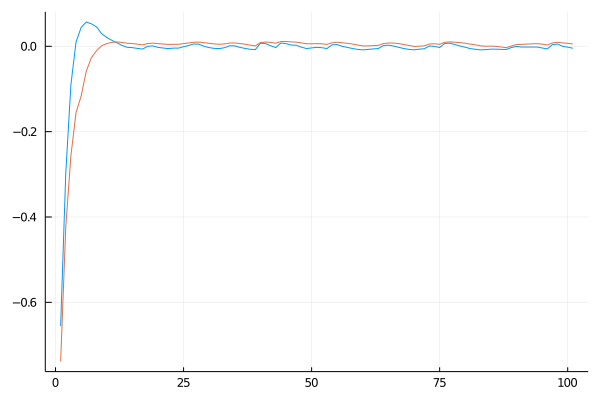

loss: 3.71:  95%|█████████████████████████████████████  |  ETA: 0:00:01

3.700046830606208

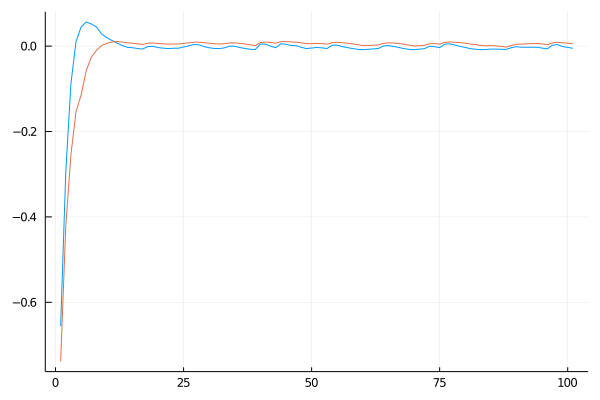

loss: 3.7:  96%|██████████████████████████████████████▍ |  ETA: 0:00:01

3.691974270157899

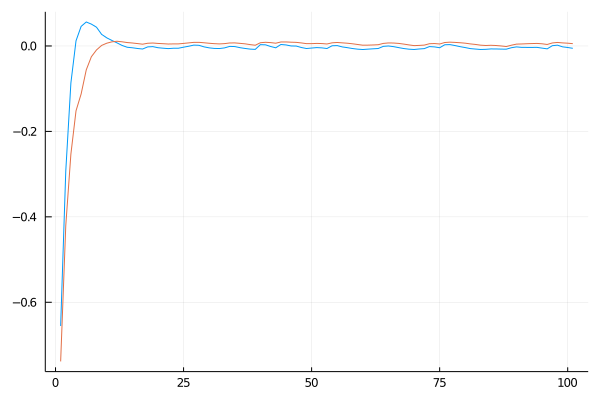

loss: 3.69:  97%|█████████████████████████████████████▉ |  ETA: 0:00:01

3.6842588985425704

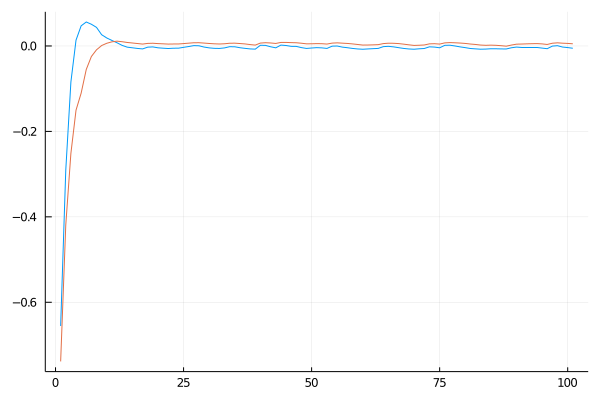

loss: 3.68:  98%|██████████████████████████████████████▎|  ETA: 0:00:01

3.676681374335574

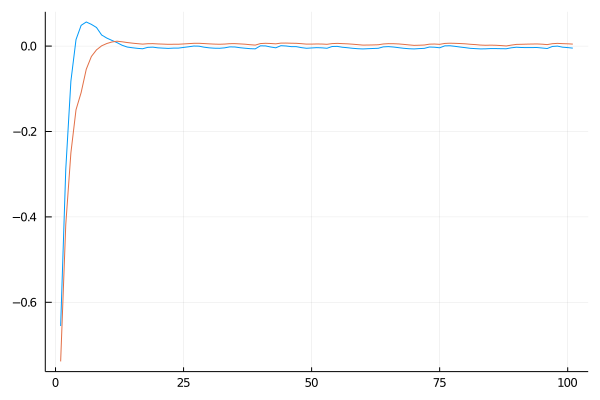

loss: 3.68:  99%|██████████████████████████████████████▋|  ETA: 0:00:00

3.6697984700660946

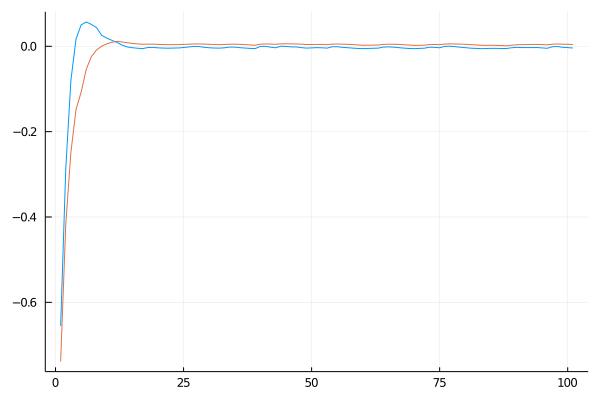

loss: 3.67: 100%|███████████████████████████████████████| Time: 0:00:25


3.6697984700660946

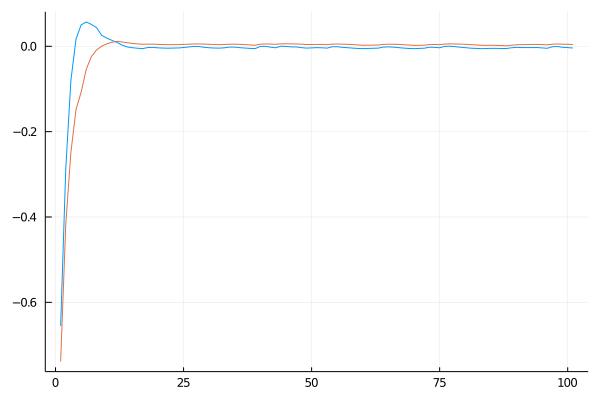

 * Status: success

 * Candidate solution
    Final objective value:     3.669798e+00

 * Found with
    Algorithm:     ADAM

 * Convergence measures
    |x - x'|               = NaN ≰ 0.0e+00
    |x - x'|/|x'|          = NaN ≰ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = NaN ≰ 0.0e+00

 * Work counters
    Seconds run:   128  (vs limit Inf)
    Iterations:    100
    f(x) calls:    100
    ∇f(x) calls:   100


In [7]:
#optim = LBFGS()
optim = ADAM(0.05)

result_neuralode = DiffEqFlux.sciml_train(loss_neuralode, node.p, optim, cb=callback, maxiters = 100)


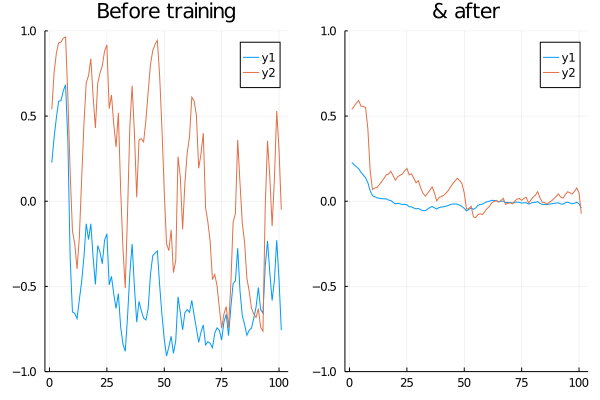

In [26]:
plt1 = plot(Array(node(spt))[:,1,:]',title="Before training",ylims=(-1, 1))
plt2 = plot(Array(node(spt, p=result_neuralode.minimizer))[:,1,:]', title="& after",ylims=(-1, 1))
plot(plt1,plt2)

# Testing adjoint callbacks

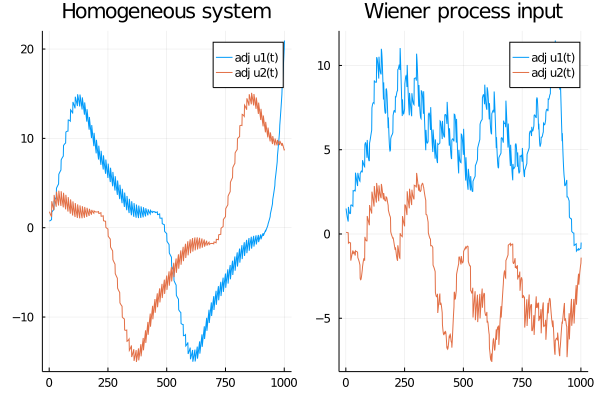

In [28]:
saveat = collect(Float32, 0:0.1:100)
cb, saved_values = generate_adj_saving_callback(∂nn,saveat,3)
node = RNNODE(∂nn, [0.f0,100.f0], saveat=tsteps, callback_adj = cb);
function predict_neuralode(p)
  Array(node(spt, p=p))
end
Zygote.gradient((p)->loss_neuralode(p)[1],node.p)


plt2 = plot(cat(saved_values.saveval...,dims=3)[:,1,:]',label=["adj u1(t)" "adj u2(t)"], title="Wiener process input")
Zygote.gradient((p)->( sum(abs2,node(node.u₀,p=node.p))),node.p)
plt1 = plot(cat(saved_values.saveval...,dims=3)[:,1,:]',label=["adj u1(t)" "adj u2(t)"], title="Homogeneous system")
plot(plt1, plt2)
#title=L"Discret loss $\lVert \mathbf{u} \rVert$"